In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

C:\Users\jas_r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# With and without Lip constraint

In [7]:
#read csv with original instances and the counterfactuals
datax0=pd.read_csv('x0inst.csv')
withoutlip=pd.read_csv('counterf_withoutlip.csv')
withlip=pd.read_csv('counterf_withlip.csv')

In [8]:
changewithlip=withlip-datax0
changewithoutlip=withoutlip-datax0

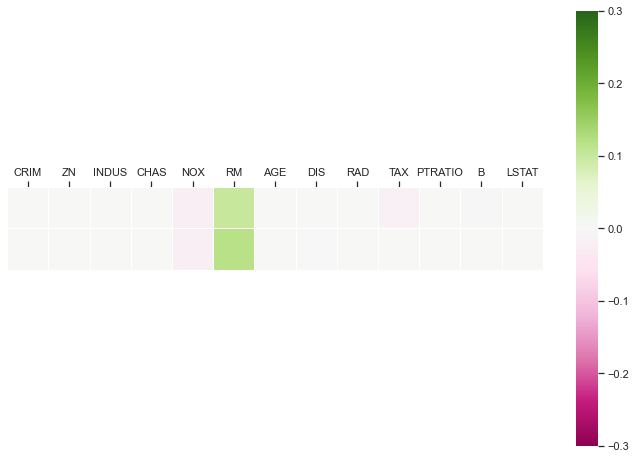

In [9]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.heatmap(changewithlip,linewidths=.5,center=0,vmin=-0.3,vmax=0.3, cmap="PiYG",yticklabels=False,square=True)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
#plt.savefig('changewithlip.png',bbox_inches='tight',dpi=100,facecolor='white')

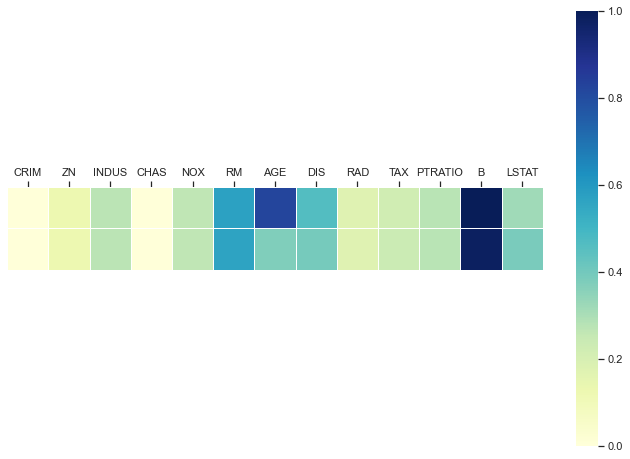

In [10]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.heatmap(withlip,linewidths=.5,center=0.5,vmin=0,vmax=1, cmap="YlGnBu",yticklabels=False,square=True)
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
#plt.savefig('counterfwithlip.png',bbox_inches='tight',dpi=100,facecolor='white')

# Many-for-one hard version

In [10]:
with open('counterf_P3_nu09_LR.json', 'r') as f:
  prots = json.load(f)
prototypes=pd.read_json(prots)

In [11]:
with open('cluster1_P3_nu09_LR.json', 'r') as f:
  cluster1 = json.load(f)
with open('cluster2_P3_nu09_LR.json', 'r') as f:
  cluster2 = json.load(f)
with open('cluster3_P3_nu09_LR.json', 'r') as f:
  cluster3 = json.load(f)
c1=pd.read_json(cluster1)
c2=pd.read_json(cluster2)
c3=pd.read_json(cluster3)

In [12]:
prototypes.index=[1,2,3]

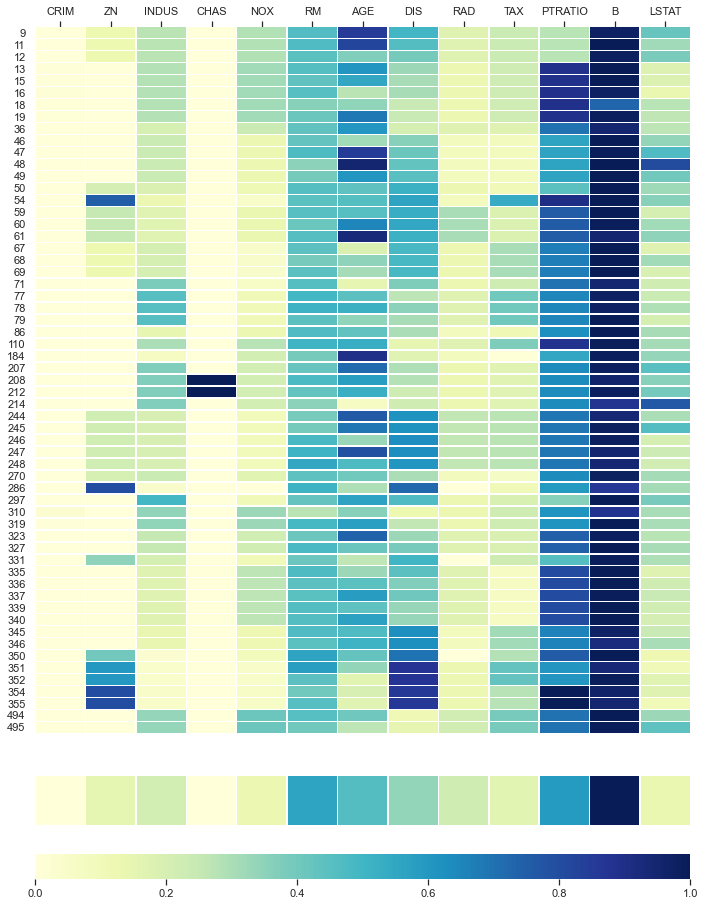

In [54]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


sns.set(rc={'figure.figsize':(10, 13)}) #10, 25


f,(ax1,ax2) = plt.subplots(2,1, 
            gridspec_kw={'height_ratios':[1,0.2]})
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
f.tight_layout()

g1 = sns.heatmap(c1,cmap="YlGnBu",cbar=False,ax=ax1,linewidths=.5,center=0.5,vmin=0,vmax=1)
g1.set_ylabel('')
g1.set_xlabel('')



divider = make_axes_locatable(ax2)
cbar_ax = divider.new_vertical(size="50%", pad=0.4, pack_start=True)
f.add_axes(cbar_ax)
g2 = sns.heatmap(pd.DataFrame(prototypes.iloc[0]).transpose(),cmap="YlGnBu",cbar=True,cbar_ax=cbar_ax,
                 ax=ax2,linewidths=.5,center=0.5,vmin=0,vmax=1,square=True,xticklabels=False,yticklabels=True,
                 cbar_kws={"orientation": "horizontal"})


g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])

for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)


plt.savefig('cluster1_nu09_yprot.png',bbox_inches='tight',dpi=100,facecolor='white')